<h2>Clustering Animal Crossing: New Horizons Reviews</h2>

<h3>Preprocessing</h3>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sb
from wordcloud import WordCloud
from sklearn.decomposition import PCA
import wordtree
import plotly.express as px
from IPython.display import Image, display
from sklearn.preprocessing import LabelEncoder

warnings.filterwarnings('ignore')

/home/zhutchens/uncc/student/3162/ClusteringProject/venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
user_reviews = pd.read_csv('data/user_reviews.csv')

In [3]:
user_reviews.head()

,grade,user_name,text,date
0,4,mds27272,My gf started playing before me. No option to ...,2020-03-20
1,5,lolo2178,"While the game itself is great, really relaxin...",2020-03-20
2,0,Roachant,My wife and I were looking forward to playing ...,2020-03-20
3,0,Houndf,We need equal values and opportunities for all...,2020-03-20
4,0,ProfessorFox,BEWARE! If you have multiple people in your h...,2020-03-20


In [4]:
user_reviews.columns

Index(['grade', 'user_name', 'text', 'date'], dtype='object')

In [5]:
user_reviews.shape

(2999, 4)

In [6]:
user_reviews.isnull().any()

grade        False
user_name    False
text         False
date         False
dtype: bool

In [7]:
user_reviews.describe()

,grade
count,2999.000000
mean,4.217406
std,4.349486
min,0.000000
25%,0.000000
50%,2.000000
75%,10.000000
max,10.000000


In [8]:
user_reviews.dtypes

grade         int64
user_name    object
text         object
date         object
dtype: object

In [9]:
fig = px.histogram(data_frame = user_reviews, x = 'grade')
fig.update_layout(barmode = 'group', bargap = 0.10, bargroupgap = 0.0)
fig.show()

In [10]:
critic_reviews = pd.read_csv('data/critic.csv')

In [11]:
critic_reviews.head()

,grade,publication,text,date
0,100,Pocket Gamer UK,"Animal Crossing; New Horizons, much like its p...",2020-03-16
1,100,Forbes,Know that if you’re overwhelmed with the world...,2020-03-16
2,100,Telegraph,"With a game this broad and lengthy, there’s mo...",2020-03-16
3,100,VG247,Animal Crossing: New Horizons is everything I ...,2020-03-16
4,100,Nintendo Insider,"Above all else, Animal Crossing: New Horizons ...",2020-03-16


In [12]:
critic_reviews.columns

Index(['grade', 'publication', 'text', 'date'], dtype='object')

In [13]:
critic_reviews.columns = user_reviews.columns
critic_reviews.head()

,grade,user_name,text,date
0,100,Pocket Gamer UK,"Animal Crossing; New Horizons, much like its p...",2020-03-16
1,100,Forbes,Know that if you’re overwhelmed with the world...,2020-03-16
2,100,Telegraph,"With a game this broad and lengthy, there’s mo...",2020-03-16
3,100,VG247,Animal Crossing: New Horizons is everything I ...,2020-03-16
4,100,Nintendo Insider,"Above all else, Animal Crossing: New Horizons ...",2020-03-16


In [14]:
critic_reviews.shape

(107, 4)

In [15]:
critic_reviews.isnull().any()

grade        False
user_name    False
text         False
date         False
dtype: bool

In [16]:
critic_reviews.describe()

,grade
count,107.000000
mean,90.635514
std,6.114308
min,70.000000
25%,90.000000
50%,90.000000
75%,94.000000
max,100.000000


In [17]:
critic_reviews.dtypes

grade         int64
user_name    object
text         object
date         object
dtype: object

In [18]:
fig = px.histogram(data_frame = critic_reviews, x = 'grade')
fig.update_layout(barmode = 'group', bargap = 0.10, bargroupgap = 0.0)
fig.show()

In [19]:
critic_reviews['grade'] = critic_reviews['grade'].apply(lambda x: x // 10)

In [20]:
fig = px.histogram(data_frame = critic_reviews, x = 'grade')
fig.update_layout(barmode = 'group', bargap = 0.10, bargroupgap = 0.0)
fig.show()

In [21]:
reviews = pd.concat(objs = [user_reviews, critic_reviews])
reviews.head()

,grade,user_name,text,date
0,4,mds27272,My gf started playing before me. No option to ...,2020-03-20
1,5,lolo2178,"While the game itself is great, really relaxin...",2020-03-20
2,0,Roachant,My wife and I were looking forward to playing ...,2020-03-20
3,0,Houndf,We need equal values and opportunities for all...,2020-03-20
4,0,ProfessorFox,BEWARE! If you have multiple people in your h...,2020-03-20


In [22]:
reviews.shape

(3106, 4)

In [23]:
fig = px.histogram(data_frame = reviews, x = 'grade')
fig.update_layout(barmode = 'group', bargap = 0.10, bargroupgap = 0.0)
fig.show()

In [24]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from string import punctuation

In [25]:
reviews['cleaned_text'] = reviews['text'].apply(lambda text: text.lower())
reviews['cleaned_text'] = reviews['cleaned_text'].apply(lambda text: text.translate(str.maketrans('', '', punctuation)))

stopwords = stopwords.words('english')
reviews['cleaned_text'] = reviews['cleaned_text'].apply(lambda text: ' '.join([word for word in text.split() if word not in stopwords]))

lemmetizer = WordNetLemmatizer()
reviews['cleaned_text'] = reviews['cleaned_text'].apply(lambda text: ' '.join([lemmetizer.lemmatize(word) for word in text.split()]))

reviews.head()

,grade,user_name,text,date,cleaned_text
0,4,mds27272,My gf started playing before me. No option to ...,2020-03-20,gf started playing option create island guy 2n...
1,5,lolo2178,"While the game itself is great, really relaxin...",2020-03-20,game great really relaxing gorgeous cant ignor...
2,0,Roachant,My wife and I were looking forward to playing ...,2020-03-20,wife looking forward playing game released bou...
3,0,Houndf,We need equal values and opportunities for all...,2020-03-20,need equal value opportunity player island wif...
4,0,ProfessorFox,BEWARE! If you have multiple people in your h...,2020-03-20,beware multiple people house want play game ac...


In [26]:
SA = SentimentIntensityAnalyzer()

sample_reviews = reviews[:3]['cleaned_text']
for review in sample_reviews:
    print(review)
    print(SA.polarity_scores(review))
    print()

gf started playing option create island guy 2nd player start console suck miss much 1st player get term activity resource etc absolutely terrible buy 2nd console one person household want get full game experience thats unacceptable
{'neg': 0.242, 'neu': 0.643, 'pos': 0.115, 'compound': -0.7713}

game great really relaxing gorgeous cant ignore one thing ruin whole experience lot people seen different user reviewsthat thing 1 island per console decision limit one person able enjoy full experience also nuke creative control island since havewhile game great really relaxing gorgeous cant ignore one thing ruin whole experience lot people seen different user reviewsthat thing 1 island per console decision limit one person able enjoy full experience also nuke creative control island since usershouse furniture hope nintendo soon fix big issue killed intention play game… expand
{'neg': 0.095, 'neu': 0.532, 'pos': 0.374, 'compound': 0.9869}

wife looking forward playing game released bought let 

In [27]:
reviews['negative'] = reviews['cleaned_text'].apply(lambda text: SA.polarity_scores(text)['neg'])
reviews['positive'] = reviews['cleaned_text'].apply(lambda text: SA.polarity_scores(text)['pos'])
reviews['neutral'] = reviews['cleaned_text'].apply(lambda text: SA.polarity_scores(text)['neu'])
reviews['compound'] = reviews['cleaned_text'].apply(lambda text: SA.polarity_scores(text)['compound'])

reviews.head() 

,grade,user_name,text,date,cleaned_text,negative,positive,neutral,compound
0,4,mds27272,My gf started playing before me. No option to ...,2020-03-20,gf started playing option create island guy 2n...,0.242,0.115,0.643,-0.7713
1,5,lolo2178,"While the game itself is great, really relaxin...",2020-03-20,game great really relaxing gorgeous cant ignor...,0.095,0.374,0.532,0.9869
2,0,Roachant,My wife and I were looking forward to playing ...,2020-03-20,wife looking forward playing game released bou...,0.073,0.214,0.713,0.8689
3,0,Houndf,We need equal values and opportunities for all...,2020-03-20,need equal value opportunity player island wif...,0.000,0.479,0.521,0.9136
4,0,ProfessorFox,BEWARE! If you have multiple people in your h...,2020-03-20,beware multiple people house want play game ac...,0.064,0.283,0.653,0.9304


In [28]:
reviews['type_review'] = reviews['compound'].apply(lambda number: 'positive' if number > 0 else 'negative')

reviews.head()

,grade,user_name,text,date,cleaned_text,negative,positive,neutral,compound,type_review
0,4,mds27272,My gf started playing before me. No option to ...,2020-03-20,gf started playing option create island guy 2n...,0.242,0.115,0.643,-0.7713,negative
1,5,lolo2178,"While the game itself is great, really relaxin...",2020-03-20,game great really relaxing gorgeous cant ignor...,0.095,0.374,0.532,0.9869,positive
2,0,Roachant,My wife and I were looking forward to playing ...,2020-03-20,wife looking forward playing game released bou...,0.073,0.214,0.713,0.8689,positive
3,0,Houndf,We need equal values and opportunities for all...,2020-03-20,need equal value opportunity player island wif...,0.000,0.479,0.521,0.9136,positive
4,0,ProfessorFox,BEWARE! If you have multiple people in your h...,2020-03-20,beware multiple people house want play game ac...,0.064,0.283,0.653,0.9304,positive


<h3>Visualizations</h3>

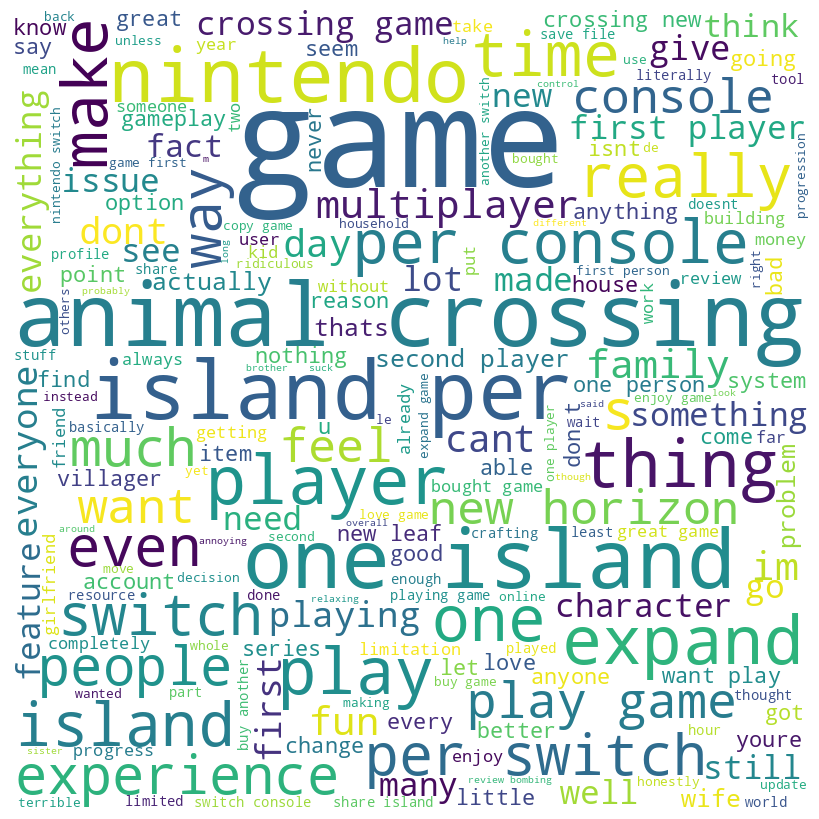

In [29]:
wordcloud = WordCloud(width = 800, height = 800, background_color = 'white').generate(' '.join([x for x in reviews['cleaned_text'].tolist()]))
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

100%|██████████| 3106/3106 [00:00<00:00, 23083.64it/s]


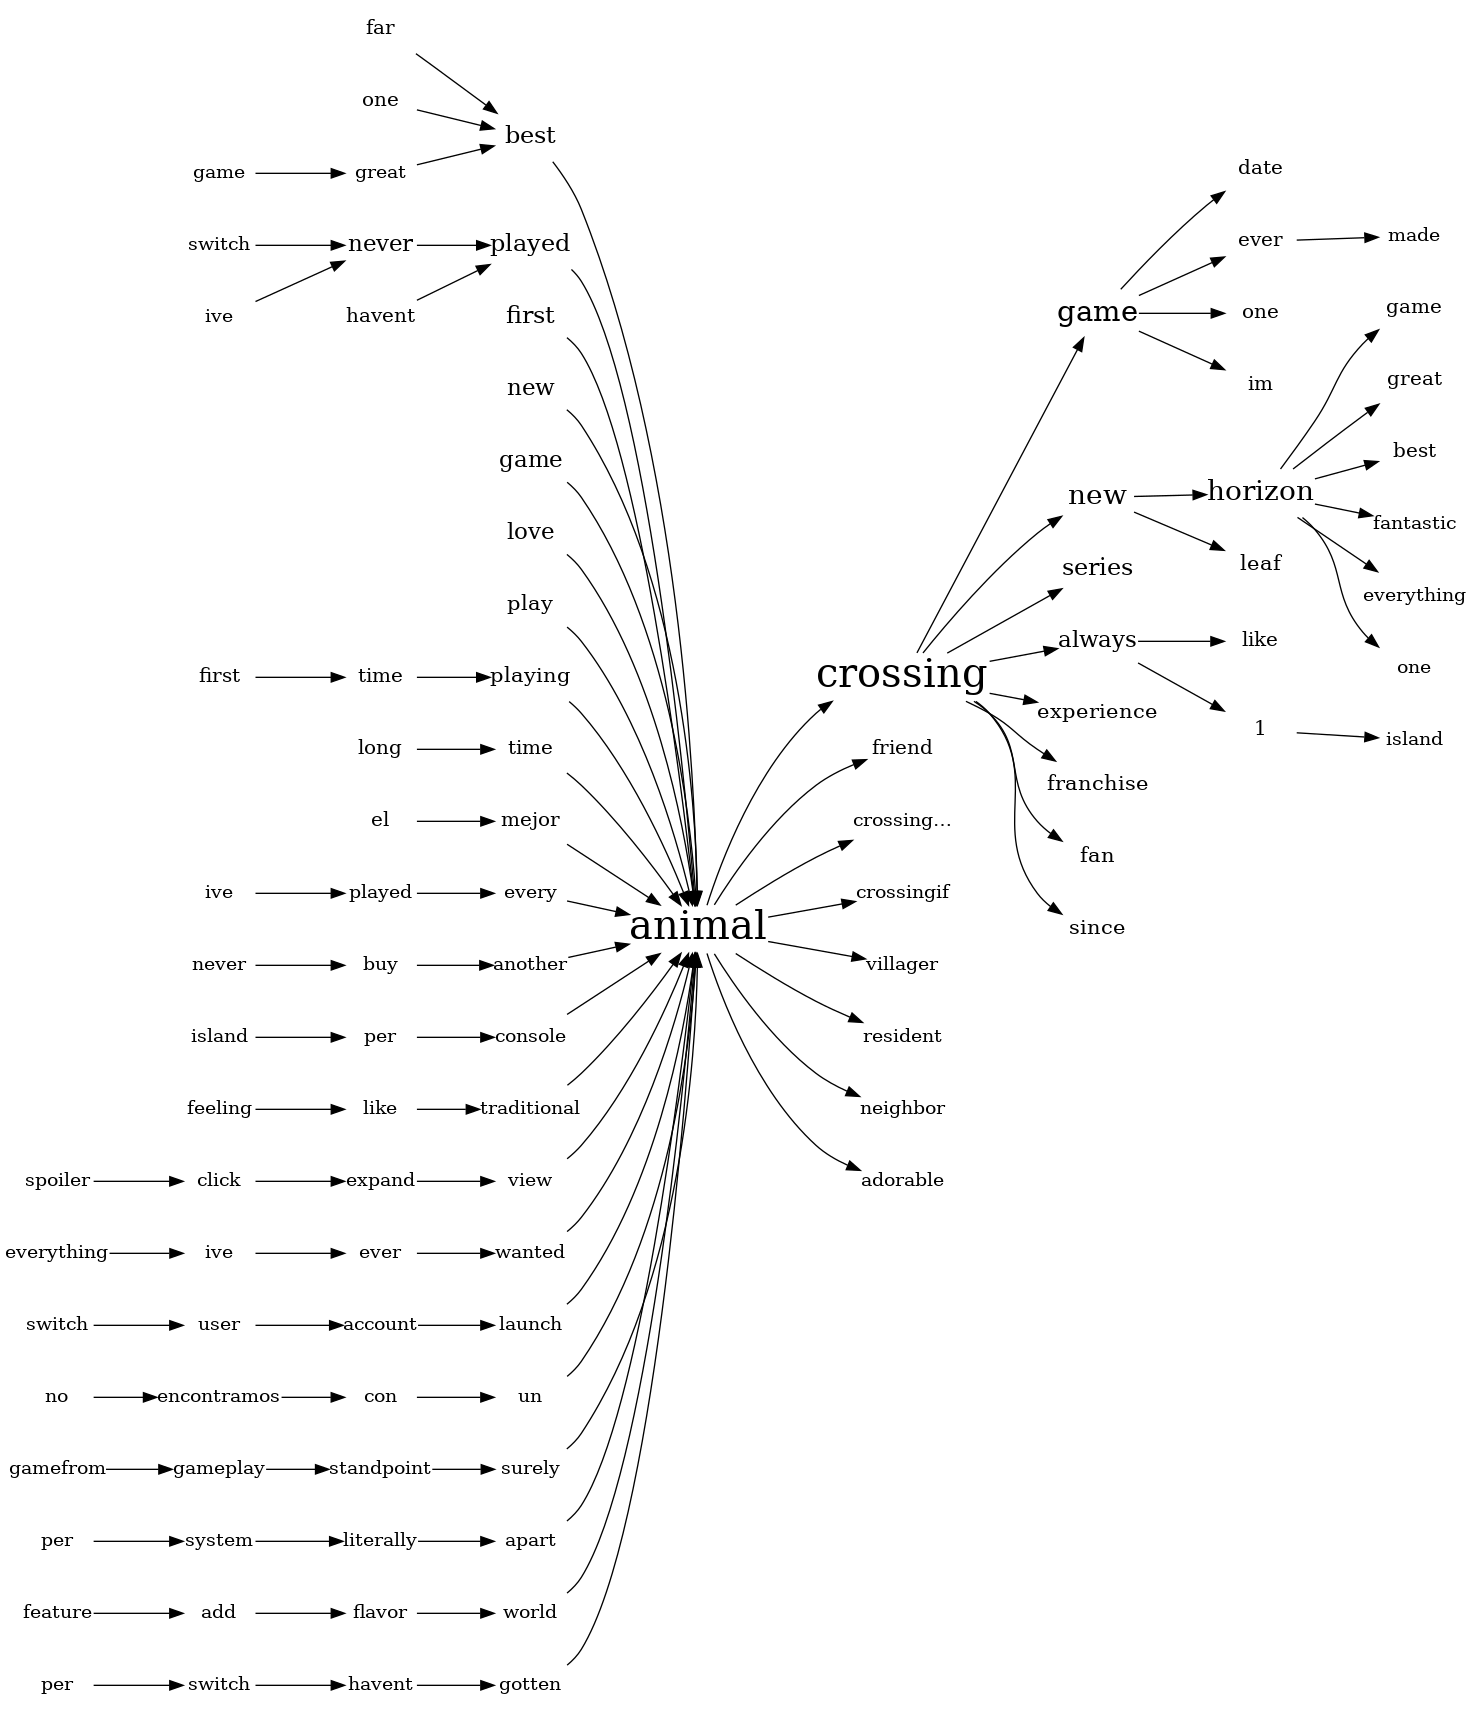

In [30]:
# Change this word to another to see other word trees 
word = 'animal'

tree = wordtree.search_and_draw(corpus = reviews['cleaned_text'].tolist(), keyword = word)
display(Image(tree.render(cleanup = True, format = 'png'), width = 1000, height = 200))

In [31]:
# Remove generated file 
!rm animal.gv.png

<h3>Modeling</h3>

In [32]:
from sklearn.cluster import KMeans

In [33]:
pca = PCA()

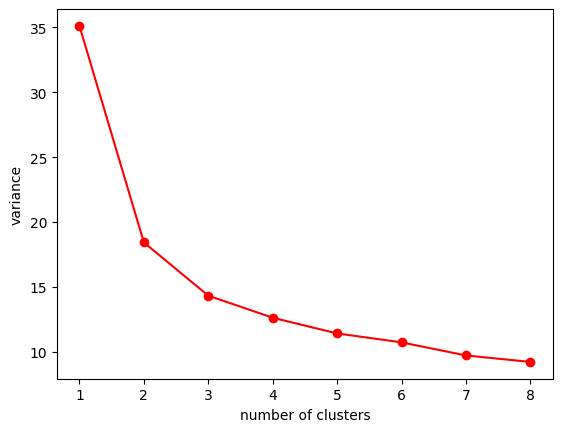

In [34]:
X = reviews[['positive', 'negative', 'neutral', 'compound']]
X_pca = pca.fit_transform(X)

inertia = []
for i in range(1, 9):
    kmeans = KMeans(n_clusters = i, random_state = 1, n_init = 'auto').fit(X_pca)
    inertia.append(np.sqrt(kmeans.inertia_))

plt.plot(range(1,9), inertia, marker = 'o', color = 'red')
plt.xlabel('number of clusters')
plt.ylabel('variance')
plt.show()

In [35]:
kmeans = KMeans(n_clusters = 2, random_state = 1, n_init = 'auto').fit(X_pca)

In [36]:
predictions = kmeans.predict(X_pca)

In [37]:
reviews['review_cluster'] = predictions
reviews.head()

,grade,user_name,text,date,cleaned_text,negative,positive,neutral,compound,type_review,review_cluster
0,4,mds27272,My gf started playing before me. No option to ...,2020-03-20,gf started playing option create island guy 2n...,0.242,0.115,0.643,-0.7713,negative,1
1,5,lolo2178,"While the game itself is great, really relaxin...",2020-03-20,game great really relaxing gorgeous cant ignor...,0.095,0.374,0.532,0.9869,positive,0
2,0,Roachant,My wife and I were looking forward to playing ...,2020-03-20,wife looking forward playing game released bou...,0.073,0.214,0.713,0.8689,positive,0
3,0,Houndf,We need equal values and opportunities for all...,2020-03-20,need equal value opportunity player island wif...,0.000,0.479,0.521,0.9136,positive,0
4,0,ProfessorFox,BEWARE! If you have multiple people in your h...,2020-03-20,beware multiple people house want play game ac...,0.064,0.283,0.653,0.9304,positive,0


In [38]:
px.scatter(data_frame = reviews, x = X_pca[:, 0], y = X_pca[:, 1], color = reviews['review_cluster'], hover_data = ['compound', 'type_review', 'user_name', 'cleaned_text'])

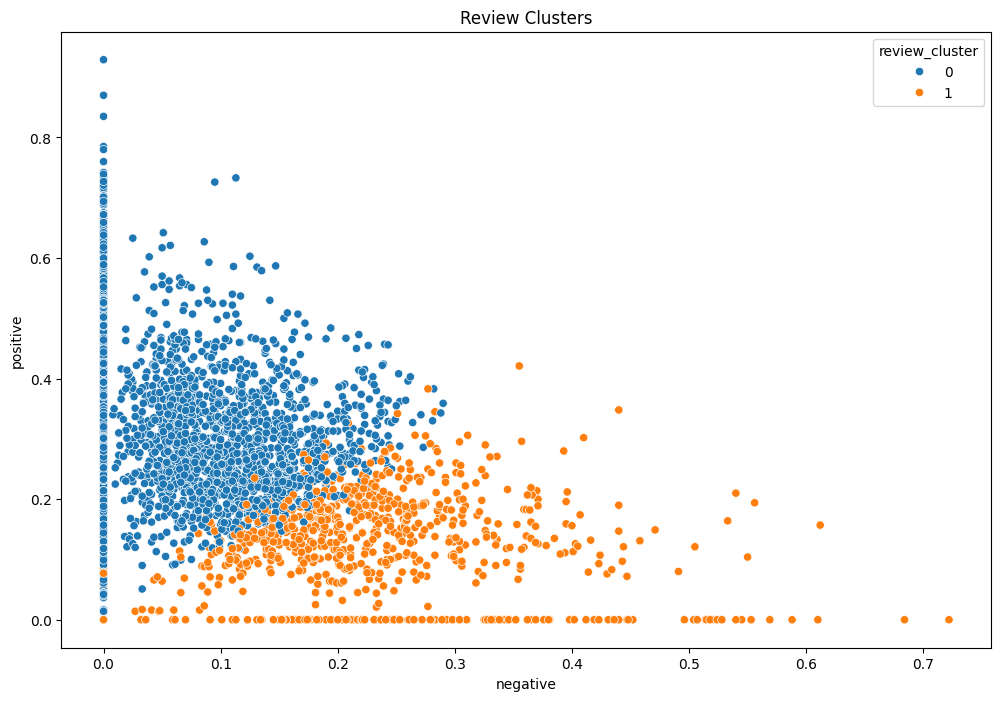

In [39]:
plt.figure(figsize = (12, 8))
sb.scatterplot(x = reviews['negative'], y = reviews['positive'], hue = reviews['review_cluster'])
plt.title('Review Clusters')
plt.show()

<h4>Clustering Villagers</h4>

In [40]:
villagers = pd.read_csv('data/villagers.csv')
villagers

,row_n,id,name,gender,species,birthday,personality,song,phrase,full_id,url
0,2,admiral,Admiral,male,bird,1-27,cranky,Steep Hill,aye aye,villager-admiral,https://villagerdb.com/images/villagers/thumb/...
1,3,agent-s,Agent S,female,squirrel,7-2,peppy,DJ K.K.,sidekick,villager-agent-s,https://villagerdb.com/images/villagers/thumb/...
2,4,agnes,Agnes,female,pig,4-21,uchi,K.K. House,snuffle,villager-agnes,https://villagerdb.com/images/villagers/thumb/...
3,6,al,Al,male,gorilla,10-18,lazy,Steep Hill,Ayyeeee,villager-al,https://villagerdb.com/images/villagers/thumb/...
4,7,alfonso,Alfonso,male,alligator,6-9,lazy,Forest Life,it'sa me,villager-alfonso,https://villagerdb.com/images/villagers/thumb/...
...,...,...,...,...,...,...,...,...,...,...,...
386,475,winnie,Winnie,female,horse,1-31,peppy,My Place,hay-OK,villager-winnie,https://villagerdb.com/images/villagers/thumb/...
387,477,wolfgang,Wolfgang,male,wolf,11-25,cranky,K.K. Song,snarrrl,villager-wolfgang,https://villagerdb.com/images/villagers/thumb/...
388,480,yuka,Yuka,female,koala,7-20,snooty,Soulful K.K.,tsk tsk,villager-yuka,https://villagerdb.com/images/villagers/thumb/...
389,481,zell,Zell,male,deer,6-7,smug,K.K. D&B,pronk,villager-zell,https://villagerdb.com/images/villagers/thumb/...


In [41]:
villagers.drop(columns = ['url'], inplace = True)

In [42]:
villagers.dtypes

row_n           int64
id             object
name           object
gender         object
species        object
birthday       object
personality    object
song           object
phrase         object
full_id        object
dtype: object

In [43]:
villagers.isna().any()

row_n          False
id              True
name           False
gender         False
species        False
birthday       False
personality    False
song            True
phrase         False
full_id        False
dtype: bool

In [44]:
villagers.dropna(inplace = True)
villagers.shape

(379, 10)

In [45]:
encoded_data = pd.DataFrame()
for col in villagers.columns:
    if villagers[col].dtype == 'object':
        encoded_data[col] = LabelEncoder().fit_transform(villagers[col])

encoded_data

,id,name,gender,species,birthday,personality,song,phrase,full_id
0,0,0,1,3,18,0,86,22,0
1,1,1,0,32,274,4,5,275,1
2,2,2,0,28,187,7,36,296,2
3,3,3,1,16,39,2,86,0,3
4,4,4,1,0,262,2,7,159,4
...,...,...,...,...,...,...,...,...,...
374,374,374,0,19,23,4,76,142,374
375,375,375,1,34,77,0,61,284,375
376,376,376,0,21,275,6,82,334,376
377,377,377,1,9,260,5,25,241,377


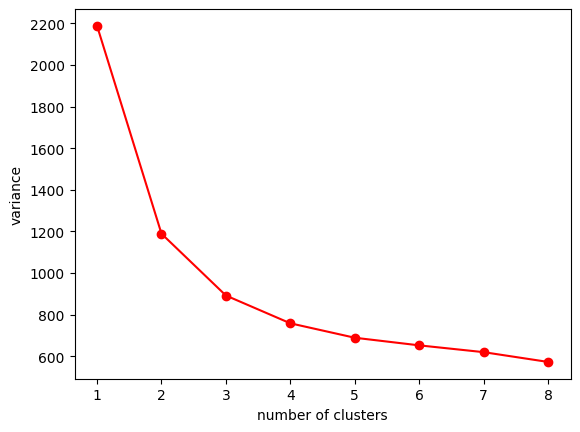

In [46]:
X = encoded_data[['gender', 'species', 'personality', 'song', 'phrase']]
X_pca = pca.fit_transform(X)

inertia = []
for i in range(1, 9):
    kmeans = KMeans(n_clusters = i, random_state = 1, n_init = 'auto').fit(X_pca)
    inertia.append(np.sqrt(kmeans.inertia_))

plt.plot(range(1,9), inertia, marker = 'o', color = 'red')
plt.xlabel('number of clusters')
plt.ylabel('variance')
plt.show()

In [47]:
kmeans = KMeans(n_clusters = 3, random_state = 1, n_init = 'auto').fit(X_pca)

In [48]:
predictions = kmeans.predict(X_pca)
villagers['cluster'] = predictions
encoded_data['cluster'] = predictions 
encoded_data

,id,name,gender,species,birthday,personality,song,phrase,full_id,cluster
0,0,0,1,3,18,0,86,22,0,0
1,1,1,0,32,274,4,5,275,1,1
2,2,2,0,28,187,7,36,296,2,1
3,3,3,1,16,39,2,86,0,3,0
4,4,4,1,0,262,2,7,159,4,2
...,...,...,...,...,...,...,...,...,...,...
374,374,374,0,19,23,4,76,142,374,2
375,375,375,1,34,77,0,61,284,375,1
376,376,376,0,21,275,6,82,334,376,1
377,377,377,1,9,260,5,25,241,377,2


In [49]:
encoded_data.describe()

,id,name,gender,species,birthday,personality,song,phrase,full_id,cluster
count,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000
mean,189.000000,189.000000,0.519789,17.076517,176.762533,3.118734,44.422164,187.704485,189.000000,0.997361
std,109.552118,109.552118,0.500269,10.209289,103.278949,2.167373,26.214341,108.893751,109.552118,0.818111
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,94.500000,94.500000,0.000000,8.000000,87.500000,1.000000,22.000000,93.500000,94.500000,0.000000
50%,189.000000,189.000000,1.000000,16.000000,176.000000,3.000000,43.000000,188.000000,189.000000,1.000000
75%,283.500000,283.500000,1.000000,27.000000,268.500000,5.000000,66.000000,281.500000,283.500000,2.000000
max,378.000000,378.000000,1.000000,34.000000,353.000000,7.000000,91.000000,375.000000,378.000000,2.000000


In [50]:
px.scatter(data_frame = villagers, x = X_pca[:, 0], y = X_pca[:, 1], color = encoded_data['cluster'], hover_data = villagers[['name', 'gender', 'species', 'birthday', 'personality', 'song', 'phrase']])